In [1]:
#Install packages
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
king_df = pd.read_csv('wa_election_data/BallotStatusReport_20220218_KI.csv',encoding='windows-1252')

In [15]:
king_df.head()

,Ballot ID,Voter ID,County,First Name,Last Name,Gender,Election,Ballot Status,Challenge Reason,Sent Date,...,City,State,Zip,Country,Split,Precinct,Return Method,Return Location,Batch Sent,Batch Returned
0,106943949,3618667,King,VICKI,AABERG,F,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,NaN,24311.0,10955.0
1,106696683,11717681,King,ISABEL,AABERG,F,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,NaN,24311.0,11259.0
2,106445951,1387270,King,GLEN,AABERG,M,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,NaN,24311.0,10955.0
3,106955695,3020297,King,DAVID,AABY,M,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,ENUMCLAW,WA,98022,USA,3247.757,ENM 31-3247,Drop Box,Enumclaw Library,24311.0,12080.0
4,106553483,3575702,King,JACQUELYN,AABY,F,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,RENTON,WA,98058,USA,2459.959,FAIRHAVEN,Mail,NaN,24311.0,10233.0


Checking against https://www.sos.wa.gov/2022-february-special-election
IMPORTANT: This is only King Country of Ballot Return Data provided from Secretary of State Elections Office.


State

Voters in Election: 3,080,390
Ballots Returned: 980,819
King

Voters in Election: 1,157,819
Ballots Returned: 362,064
I have 362,064 total rows of assumed 1 voter per row

# Exploratory Data Analysis

In [5]:
king_df.describe()

,Ballot ID,Voter ID,Split,Batch Sent,Batch Returned
count,3.620640e+05,3.620640e+05,362059.000000,361508.000000,362062.000000
mean,1.064957e+08,6.087069e+06,1984.490888,24317.804851,11431.377178
std,4.637121e+05,3.964290e+06,1075.674536,69.374150,694.664158
min,1.058951e+08,2.500000e+02,1.802000,24306.000000,9000.000000
25%,1.061822e+08,2.918239e+06,1179.506000,24311.000000,10933.000000
50%,1.064669e+08,3.538996e+06,1936.936000,24311.000000,11534.000000
75%,1.067527e+08,1.025077e+07,2832.749000,24311.000000,12032.000000
max,1.100954e+08,1.333677e+07,3953.308000,25630.000000,12433.000000


### How many ballots were returned?

In [7]:
# Total rows in our datasets
total_elligible_voters = 1157819
ballots_returned = king_df.shape[0]

print("Ballots Returned:", king_df.shape[0])
print("Percent Returned:", f"{king_df.shape[0]/total_elligible_voters:.2%}")

Ballots Returned: 362064
Percent Returned: 31.27%


In [9]:
#TODO: Add visual

### How many Ballots were accepted?

In [8]:
# Ballot status: accepted
ballot_status = king_df['Ballot Status'].value_counts()
accepted_ballots = ballot_status.loc[['Accepted']][0]

print("Ballots:",ballot_status.loc[['Accepted']][0] )
print("Percent Accepted of Returned Ballots:", f"{accepted_ballots/ballots_returned:.2%}")
print("Percent of Elligible Voters with Accepted Ballots:", f"{accepted_ballots/total_elligible_voters:.2%}" )

Ballots: 356818
Percent Accepted of Returned Ballots: 98.55%
Percent of Elligible Voters with Accepted Ballots: 30.82%


In [10]:
# TODO: Add visual

Return Method
Mail        214890
Drop Box    145872
Name: count, dtype: int64


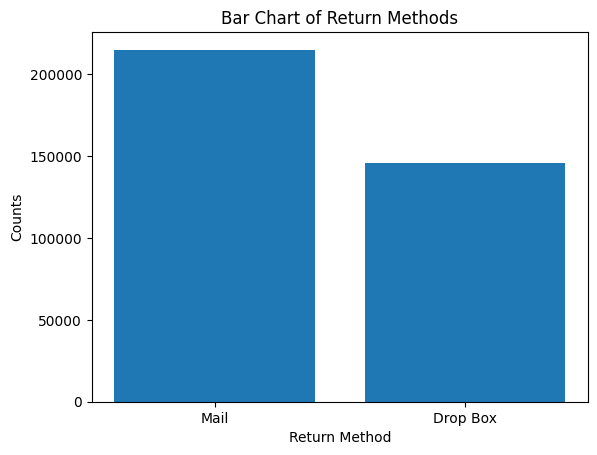

In [16]:
# create a bar chart of total counts: mail vs drop box

#total counts for each value
return_method_counts = king_df['Return Method'].value_counts()
selected_counts = return_method_counts.loc[['Mail','Drop Box']]
print(selected_counts)

#Bar chart
plt.bar(selected_counts.index, selected_counts.values)
plt.xlabel('Return Method')
plt.ylabel('Counts')
plt.title('Bar Chart of Return Methods')
plt.show()